<a href="https://colab.research.google.com/github/anammagalhaes/Data-Science-Projects-/blob/master/An%C3%A1lise_dos_dados_do_Airbnb_de_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb de Paris 

Já pensou em viajar ao redor do mundo e se hospedar com conforto à custo acessível? Ou então, alugar seus imóveis com segurança? O Airbnb responde à estas expectativas com apenas alguns cliques. 

O [Airbnb](https://www.airbnb.com.br/) é um serviço online, em que pessoas do mundo todo anunciam, e reservam acomodações e meios de hospedagem. Desta forma, são anunciados mais de 500 mil imóveis em mais de 35.000 cidades e 192 países. Como uma plataforma inovadora no meio hoteleiro, o Airbnb desafia com seus serviços as redes hoteleiras tradicionais e segue em pleno crescimento. São oferecidos de quartos individuais ou compartilhados até apartamentos e casas inteiras.

Paris, capital da França e a famosa "Cidade da Luz", a qual é iluminada por sua história e beleza, sempre foi rota e destino de estrangeiros e turistas. Além disso, de acordo com [VivaMundo](https:/https://viva-mundo.com/pt/noticia/post/melhores-cidades-para-estudar/), possui 17 instituições classificadas no ranking universitário da QS - QS World University Rankings -, duas delas entre as 100 melhores do mundo. Ou seja, acolhe as mais prestigiadas escolas nas áreas da ciência e dos negócios, além de diversas empreasas, o que atrai os estudantes intercambistas e profissionais de diversos outros países. E, de fato, estes são fatores que movimentam a rede hoteleira parisiense. 

Este artigo, o qual se apresenta de fomra resumida, tem a finalidade de analisar os dados brutos do Airbnb referentes à cidade de Paris e extrair insights sobre localização e preço dos aluguéis e duração das locações utilizando ferramentas como Python e suas bibliotecas. Estes dados foram retirados do portal [Inside Airbnb](https://http://insideairbnb.com/get-the-data.html).


![Paris](https://immo2.pro/images/wp-images/2016/04/airbnb_paris_intropic.jpg)

## Obtenção dos Dados



A partir do portal Inside Airbnb, citado anteriormente, foi feito o download do arquivo: listings.csv - Summary information and metrics for listings in Paris (good for visualisations). 

In [ ]:
# Importar os pacotes que serão utilizados. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [ ]:
# Importar o arquivo listings.csv para um DataFrame. 
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-05-10/visualisations/listings.csv")

## Análise dos Dados 

Esta etapa tem como finalidade permitir o entendimento de como os dados estão estruturados e, portanto, criar uma consistência situacional inicial do problema. 

### Dicionário das variáveis 


    

*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


### Q1. Quantos atributos , ou variáveis, e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?

In [ ]:
#Identificar o volume de dados do DataFrame 
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

#Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	66900
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

A partir desta análise, podemos verificar que este conjunto de dados possui 16 variáveis, distribuidas em 16 colunas e 66900 entradas, bem como os tipos de variáveis estão presentes neste dataset. 

Antes de iniciar qualquer análise, vamos verificar o dataset, analisando as 5 primeiras entradas.

In [ ]:
# Mostrar as 5 primeiras entradas 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.06,1,365
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.22,1,365
2,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,220,2020-03-22,1.66,1,91
3,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,119,10,268,2020-02-26,2.42,5,264
4,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,330


### Q2. Qual a porcentagem de valores ausentes no *dataset*? 
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, ou seja, nulos. É importante entender se esses valores ausentes são significativos ao serem comparados ao total de entradas.

In [ ]:
##Alocar em ordem crescente as variáveis por seus valores ausentes.
n=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(n)
df_n.style.format(" {:.2%}")

,0
neighbourhood_group,100.00%
reviews_per_month,20.93%
last_review,20.93%
name,0.10%
host_name,0.01%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%



A partir desta análise foi possível fazer as seguintes afirmações: 
*   A variável neighbourhood_group é composta por 100% de valores ausentes, logo, mais adianta ela será excluida do dataset.
*   As variáveis reviews_per_month e last_review são compostas, cada uma, por aproximadamente 20% de valores nulos. 
* A variável name possui cerca de 0,10% de variáveis nulas, já a host_name apresenta em torno de 0,01%. 
* As demais variáveis não apresentam valores ausentes. 



###Q3. Qual o tipo de distribuição das variáveis? 
Para visualizar a distribuição das variáveis é aconselhável plotar seus histogramas. 

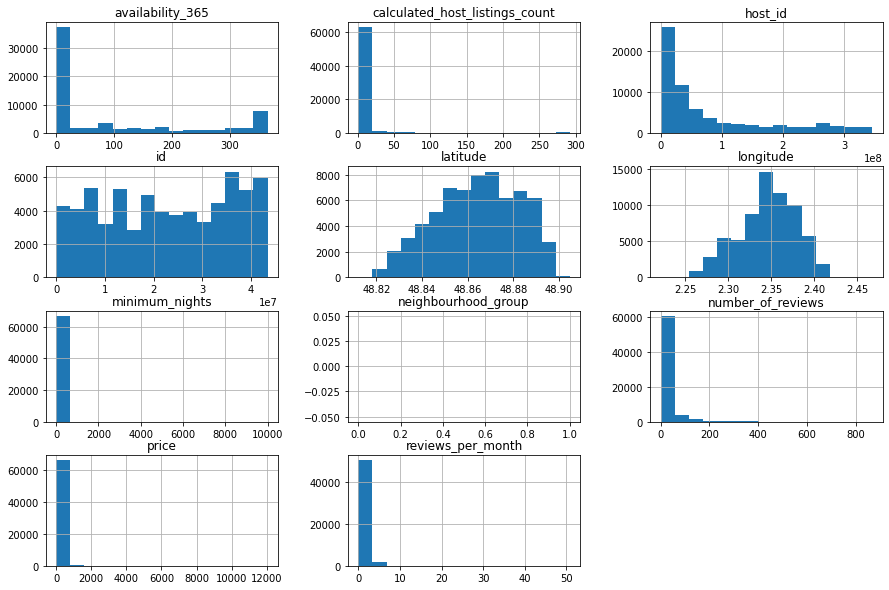

In [ ]:
# Plotar o histograma das variáveis numéricas. 
df.hist(bins=15, figsize=(15,10)); 

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Ou seja, os valores que compõe os gráficos não seguem uma distribuição, e portanto, distorcem a representação gráfica. Isto é bastante visivel nas variáveis price,  reviews_per_month, minimum_nights, number_of_reviews, calculated_host_listings_count. 

###Q4. Há outliers  presentes? 

Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise. De acordo com [Aquarela](https:/https:/www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/), entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos: os outliers podem viesar negativamente todo o resultado de uma análise. 

Para a melhor detecção de outliers, pode-se utilizar duas maneiras, as quais são: 

*   Resumo estatístico por meio do método describe(), 
*   Plotar boxplots para as variáveis. 



####Resumo estatístico 

In [ ]:
# Ver o resumo estatístico das variáveis numéricas
df[['price', 'reviews_per_month', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']].describe()


,price,reviews_per_month,minimum_nights,number_of_reviews,calculated_host_listings_count
count,66900.000000,52901.000000,66900.000000,66900.000000,66900.000000
mean,134.168416,0.909946,5.514275,20.384813,8.673901
std,370.829120,1.171624,43.776247,42.185357,34.515766
min,0.000000,0.010000,1.000000,0.000000,1.000000
25%,60.000000,0.190000,1.000000,1.000000,1.000000
50%,85.000000,0.510000,2.000000,6.000000,1.000000
75%,125.000000,1.180000,4.000000,21.000000,1.000000
max,12039.000000,50.810000,9999.000000,867.000000,292.000000


Sendo, 

* count - Contagem de valor de variáveis
* mean - Média dos valores da variável
* std - Desvio padrão
* min - Valor mínimo presente na coluna
* 25% - 25% dos valores presentes na coluna
* 50% - 50% dos valores presentes na coluna (mediana)
* 75% - 75% dos valores presentes na coluna
* max - Valor máximo presente na coluna

Com base no resumo estatístico demonstrado anteriormente, é possivel fazer as seguintes hipóteses:
 
* O valor máximo de preço das hospedagens é 12039 euros, sendo que 75% dos alugueis se encontram abaixo de 125 euros, apenas 25% dos valores se encontram abaixo de 60 euros e a média dos preços é, aproximadamente, 134 euros. No entanto, é observado que há um alto desvio padrão, mostrando que o preço varia bastante da média de preços. Estes são os insights extraidos da coluna/variável Price nesta análise.

* A média é de que os imóveis são alugados por 5 noites, mas que isso varia bastante, tendo chegado a locações de um ano ou 9999 noites. 

* A partir da coluna calculated_host_listings_count é observado que há 292 imóveis do mesmo dono. 
   

#### Boxplot para price 

price:valores acima de 500 euros:
1484 entradas
0.0179%


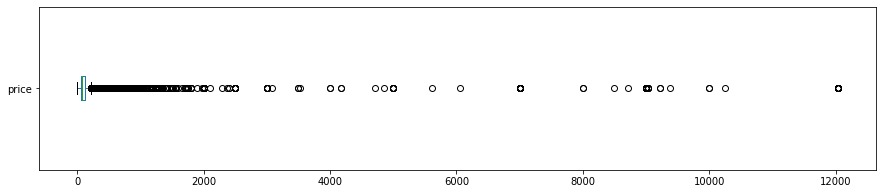

In [ ]:
# price 
df.price.plot(kind='box', vert=False, figsize=(15,3))

# Ver a quantidade de valores acima de 500 euros para a variável price
print("price:valores acima de 500 euros:")
print("{} entradas".format(len(df[df.price>500])))
print("{:.4f}%".format((len(df[df.minimum_nights > 500]) / df.shape[0])*100))


####Boxplot para minimum_nights 

minimum_nights:valores acima de 40 noites:
907 entradas
1.3558%


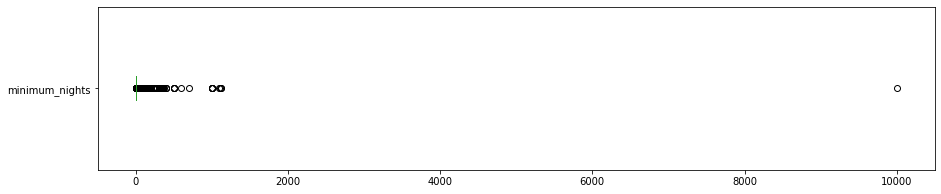

In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

# Ver a quantidade de valores acima de  para a variável minimum_nights
print("minimum_nights:valores acima de 40 noites:")
print("{} entradas".format(len(df[df.minimum_nights>40])))
print("{:.4f}%".format((len(df[df.minimum_nights > 40]) / df.shape[0])*100))

####Boxplot para reviews_per_month

reviews_per_month:valores acima de 10:
31 entradas
0.0463%


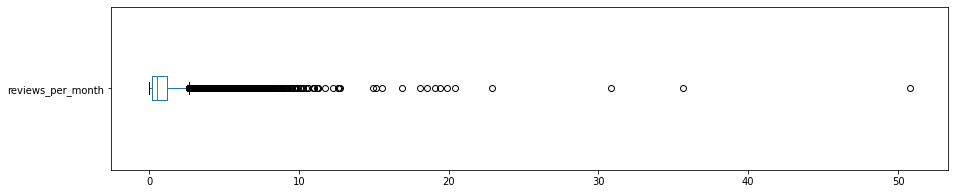

In [ ]:
# reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))

# Ver a quantidade de valores acima de  para a variável reviews_per_month
print("reviews_per_month:valores acima de 10:")
print("{} entradas".format(len(df[df.reviews_per_month>10])))
print("{:.4f}%".format((len(df[df.reviews_per_month > 10]) / df.shape[0])*100))

####Boxplot para number_of_reviews


number_of_reviews:valores acima de 250:
435 entradas
0.6502%


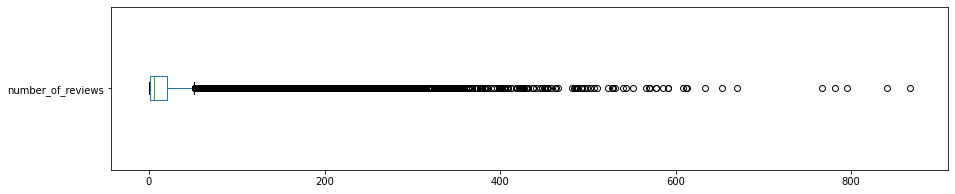

In [ ]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))

# Ver a quantidade de valores acima de  para a variável number_of_reviews
print("number_of_reviews:valores acima de 250:")
print("{} entradas".format(len(df[df.number_of_reviews>250])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 250]) / df.shape[0])*100))

####Histogramas sem outliers
A partir da verificação dos outliers nas variáveis expostas no ítem anterior, foi possível realizar uma limpeza nos dados do DataFrame e plotar novamente os histogramas. 

Quantidade de entradas após limpeza64077
Quantidade de variáveis após limpeza 16
Ou seja, foram retirados 4.22% de dados na limpeza do dataset


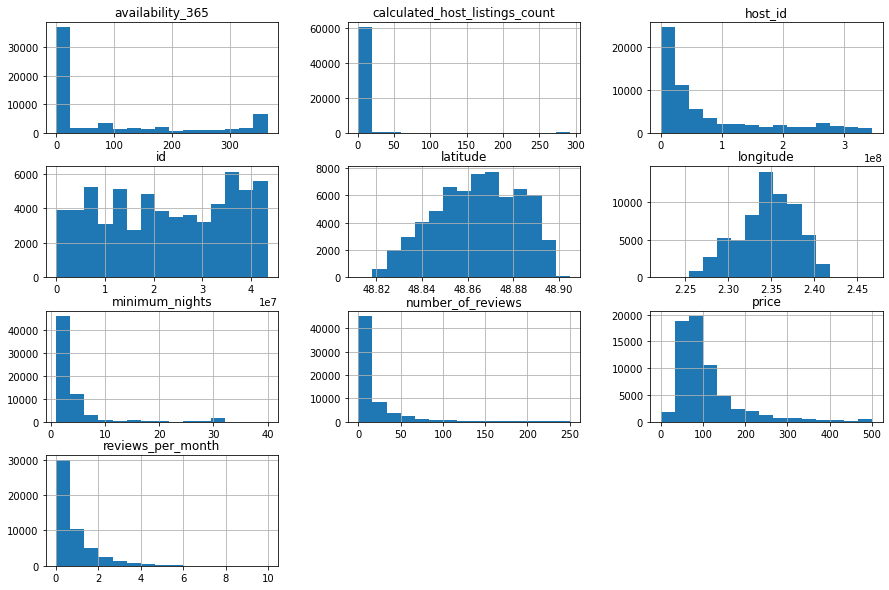

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 250].index, axis=0, inplace=True)

print('Quantidade de entradas após limpeza{}'.format(df_clean.shape[0]))
print('Quantidade de variáveis após limpeza {}'.format(df_clean.shape[1]))
reduzido = (df_clean.shape[0] / df.shape[0]) -1
print('Ou seja, foram retirados {:.2%} de dados na limpeza do dataset'.format(reduzido * (-1)))

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

##Q4. Qual a correlação existente entre as variáveis?

A correlação é feita a partir do coeficiente de correlação entre duas variáveis e da intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse. Para isso, podem ser feitos:

* Uma matriz de correlação, 
* Um *heatmap* dessa matriz, usando a biblioteca seaborn. 

In [ ]:
# # criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.015231,0.032181,0.064219,0.153902,0.299271
minimum_nights,0.015231,1.000000,-0.054904,-0.123014,0.225150,0.163632
number_of_reviews,0.032181,-0.054904,1.000000,0.679100,-0.042642,0.261903
reviews_per_month,0.064219,-0.123014,0.679100,1.000000,0.017030,0.288435
calculated_host_listings_count,0.153902,0.225150,-0.042642,0.017030,1.000000,0.205369
availability_365,0.299271,0.163632,0.261903,0.288435,0.205369,1.000000


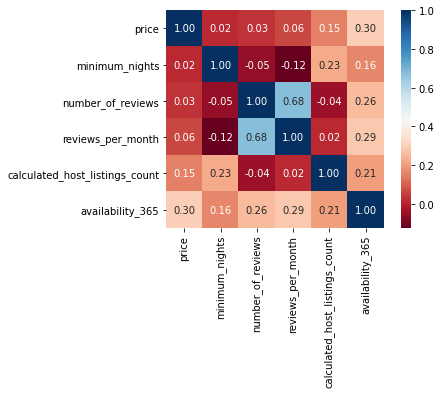

In [ ]:
sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com base no *heatmap* é possível identificar que não há uma correlação alta entre as variaveis. 

##Q5. Qual o tipo de imóvel mais alugado no Airbnb?

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Portanto, é possível analisar as ocorrências de cada tipo de aluguel, utilizando o método value_counts(). 

In [ ]:
#mostrar a porcentagem de cada tipo de imóvel disponível
b = (df_clean.room_type.value_counts() / df_clean.shape[0])
df_clean_b = pd.DataFrame(b)
df_clean_b.style.format('{:.2%}')

,room_type
Entire home/apt,87.12%
Private room,10.71%
Hotel room,1.56%
Shared room,0.61%


É possivel afirmar, portanto, que a maioria das locações, em 87% aproximadamente, são feitas para apartamentos ou casas inteiras e que não é comum as pessoas optarem por quartos compartilhados. 

##Q6. Qual a localidade mais cara de Paris? 

É possível comparar uma variável com outra utilizando groupby(). No caso, foi utilizado comparando os bairros (neighbourhoods) a partir do preço médio de locação. 

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            158.157960
Louvre            151.484634
Luxembourg        150.655395
Palais-Bourbon    147.113068
Hôtel-de-Ville    142.258082
Temple            136.169184
Passy             132.849396
Bourse            128.348416
Panthéon          122.281852
Opéra             117.060165
Name: price, dtype: float64

Com base nesta análise, é possível verificar que a variação de preço médio do mais caro para o mais barato não é muito alta. Em especial, os três locais mais caros para se alugar são Élysée, Louvre, Luxembourg, provavelmente por serem mais próximos aos principais pontos turisticos de Paris. 

##Q7. Quantos imóveis há nestes locais?



In [ ]:
# ver quantidade de imóveis no Élysée
print(df_clean[df_clean.neighbourhood == "Élysée"].shape)

(1608, 15)


In [ ]:
# ver quantidade de imóveis no Louvre
print(df_clean[df_clean.neighbourhood == "Louvre"].shape)

(1269, 15)


In [ ]:
# ver quantidade de imóveis no Opéra
print(df_clean[df_clean.neighbourhood == "Opéra"].shape)

(3025, 15)


In [ ]:
# ver quantidade de imóveis no Bourse
print(df_clean[df_clean.neighbourhood == "Bourse"].shape)

(2210, 15)


In [ ]:
# ver quantidade de imóveis no Bourse
print(df_clean[df_clean.neighbourhood == "Panthéon"].shape)

(2182, 15)


São vistos, portanto, muitos imoveis em todos os bairros, o que, provavelmente contribui para uma variação de preços não muito grande entre os imóveis. 

##Q8. Como estão distribuidos os imóveis por Paris?

Como são fornecidas as latitudes e longitudes para os imóveis, ou seja, a localização dos imóveis pela cidade. Assim é possível plotar cada ponto considerando x=longitude e y=latitude.

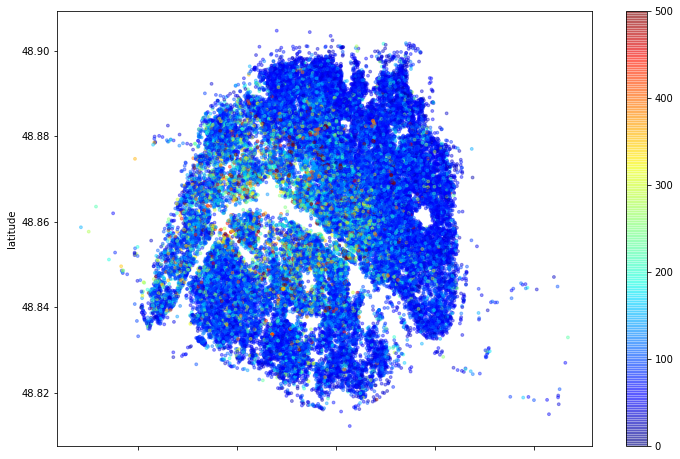

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Baseado na imagem, é possivel afirmar que não há uma variação expressiva no preço dos imóveis, o que confirma o que foi descrito anteriormente. A grande maioria dos anúncios e locações são de apartamentos ou casas inteiras e tem preços médios em torno, de 100 euros, os quais, identificados pela cor azul no gráfico, é possivel que sejam encontrados em todo o território. 

No entanto, e obviamente apresentam alguns locais que os valores são mais altos, novamente, pela proximidade aos principais pontos turísticos. 

###Conclusões 

Apesar do *dadtaset* utilizado ser uma versão resumida dos dados do Airbnb, foi possível fazer uma abordagem inicial e superficial dos imóveis, preço, localização, e periodicidade das locações em Paris. 

Com base nas análises realizadas, foi observado que existem *outliers* em algumas variáveis e que poderiam atrapalhar a análise. Portanto foi necessária uma limpeza, na qual reduziu o dataset em 4%, aproximadamente, e possibilitou uma melhor extração dos *insights*. 

Foi possível levantar algumas hipóteses, como: 
A grande maioria dos anúncios e locações são de apartamentos ou casas inteiras e, que em média, não apresentam muita variação de preço entre os diferentes bairros. Apesar de os bairros Elysée e Louvre e Luxembourg apresentarem os aluguéis mais altos. Além disso, todos os bairros apresentam mais de mil imóveis cadastrados no Airbnb, o que exalta a popularidade da plataforma frente às redes hoteleiras em Paris. Portanto, é possível encontrar diversas opções de acomodação na cidade toda. 

A grande vantagem do Airbnb é que o preço de um aluguel de um apartamento todo,que em média é aproximadamente 150 euros nos bairros considerados mais caros, é o que se paga em somente um quarto de um hotel em redes hoteleiras tradicionais de Paris. Este é uma das razões do grande crescimento e procura pelo Airbnb, que além de segurança, privacidade e diversas opções, oferece preço bastante reduzido. 

